In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('Walmart_Store_sales.csv')

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
max_sales_store = df.groupby('Store')['Weekly_Sales'].sum().idxmax()
max_sales_value = df.groupby('Store')['Weekly_Sales'].sum().max()
print(f"Store with maximum sales: {max_sales_store} with sales of {max_sales_value}")


Store with maximum sales: 20 with sales of 301397792.46


In [8]:
store_std = df.groupby('Store')['Weekly_Sales'].std()
max_std_store = store_std.idxmax()
max_std_value = store_std.max()

In [9]:
print(f"Store with maximum std deviation: {max_std_store} with a value of {max_std_value}")

Store with maximum std deviation: 14 with a value of 317569.9494755081


In [10]:
mean_sales = df.groupby('Store')['Weekly_Sales'].mean()
cv = store_std / mean_sales

In [11]:
print(f"Coefficient of Variation (mean/std): {cv[max_std_store]}")

Coefficient of Variation (mean/std): 0.15713673600948333


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Quarter'] = df['Date'].dt.to_period('Q')

q3_sales_2012 = df[(df['Quarter'] == '2012Q3')].groupby('Store')['Weekly_Sales'].sum()
q2_sales_2012 = df[(df['Quarter'] == '2012Q2')].groupby('Store')['Weekly_Sales'].sum()

growth_rate_q3 = ((q3_sales_2012 - q2_sales_2012) / q2_sales_2012) * 100
top_growth_store = growth_rate_q3.idxmax()
print(f"Store with the highest growth rate in Q3 2012: {top_growth_store} with a growth rate of {growth_rate_q3[top_growth_store]:.2f}%")


Store with the highest growth rate in Q3 2012: 16 with a growth rate of -2.79%


/tmp/ipykernel_295/3799271164.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [13]:
non_holiday_mean_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

holiday_sales = df[df['Holiday_Flag'] == 1].groupby('Date')['Weekly_Sales'].sum()
high_sales_holidays = holiday_sales[holiday_sales > non_holiday_mean_sales]
print("Holidays with higher sales than non-holiday mean:")



Holidays with higher sales than non-holiday mean:
Date
2010-10-09    45634397.84
2010-11-26    65821003.24
2010-12-02    48336677.63
2010-12-31    40432519.00
2011-09-09    46763227.53
2011-11-02    47336192.79
2011-11-25    66593605.26
2011-12-30    46042461.04
2012-07-09    48330059.31
2012-10-02    50009407.92
Name: Weekly_Sales, dtype: float64


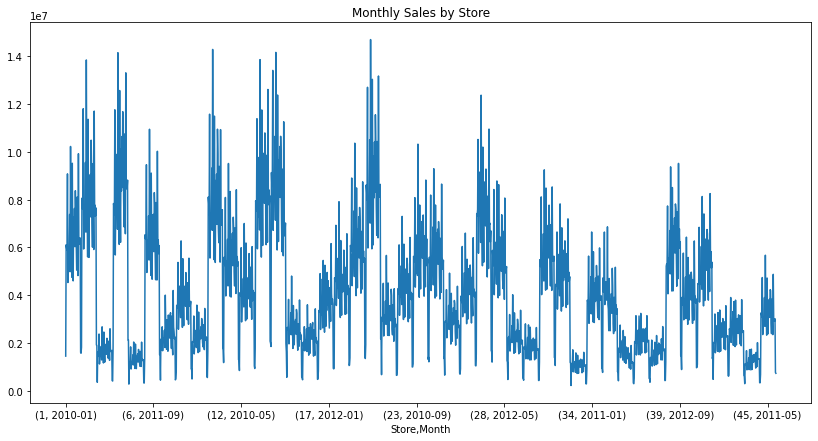

In [15]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby(['Store', 'Month'])['Weekly_Sales'].sum()

df['Semester'] = df['Date'].dt.month // 6 + 1
semester_sales = df.groupby(['Store', 'Semester'])['Weekly_Sales'].sum()

# Plot monthly sales for a visual insight
monthly_sales.plot(kind='line', figsize=(14, 7), title="Monthly Sales by Store")
plt.show()


In [16]:
store_1_df = df[df['Store'] == 1].copy()
store_1_df['Date_Ord'] = store_1_df['Date'].apply(lambda x: x.toordinal())

X = store_1_df[['Date_Ord', 'CPI', 'Unemployment', 'Fuel_Price']]
y = store_1_df['Weekly_Sales']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Coefficients
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {dict(zip(X.columns, model.coef_))}")


Mean Squared Error: 37533099258.67551
R-squared: -0.13378802131690026
Model Coefficients:
Intercept: -35433586.02541471
Coefficients: {'Date_Ord': 49.872427890873865, 'CPI': 2532.4512893672763, 'Unemployment': -20816.326903001725, 'Fuel_Price': -13928.829419485432}
